In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv
/kaggle/input/summeranalytics2020/train.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
trainX=pd.read_csv('../input/summeranalytics2020/train.csv')
trainy=trainX.Attrition
trainX.drop(['Attrition','EmployeeNumber'],axis=1,inplace=True)
encodecolumns=trainX.select_dtypes(include='object').columns
le = preprocessing.LabelEncoder()
for l in encodecolumns:
    trainX[l]=le.fit_transform(trainX[l])
X_train,X_valid,y_train,y_valid= train_test_split(trainX,trainy,test_size=0.2,random_state=37)


In [3]:
testx=pd.read_csv('../input/summeranalytics2020/test.csv')
testx.drop(['EmployeeNumber'],axis=1,inplace=True)
for l in encodecolumns:
    testx[l]=le.fit_transform(testx[l])


In [4]:

model = XGBClassifier(objective='binary:logistic',booster='gbtree',max_depth=20,n_estimators=270)
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model, trainX, trainy, cv=kfold)
results.mean()

0.791642051049004

model.fit(X_train,y_train,verbose=False,eval_set=[(X_valid,y_valid)],eval_metric='auc')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


maxscores=[] for m in range(1,14): scores=[]

for l in range(10,110):
    
maxscores.append(max(scores))



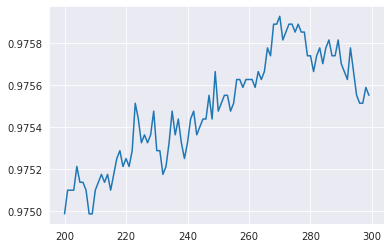

In [5]:
scores=[]
for l in range(200,300):
    model = XGBClassifier(objective='binary:logistic',booster='gbtree',max_depth=20,n_estimators=l,learning_rate=0.1)
    model.fit(X_train,y_train,verbose=False,eval_set=[(X_valid,y_valid)],eval_metric='auc')
    predictions= model.predict_proba(X_valid)[:,1]
    scores.append(roc_auc_score(y_valid,predictions))
sns.set_style('darkgrid')
plt.plot(range(200,300),scores)
plt.show()



In [6]:
model = XGBClassifier(objective='binary:logistic',booster='gbtree',max_depth=20,n_estimators=270,learning_rate=0.1)
model.fit(X_train,y_train,verbose=False,eval_set=[(X_valid,y_valid)],eval_metric='auc')
predictions= model.predict_proba(X_valid)[:,1]
print(roc_auc_score(y_valid,predictions))
print(accuracy_score(y_valid,model.predict(X_valid)))


0.975929069986795
0.9202453987730062


In [7]:
  
model = XGBClassifier(objective='binary:logistic',booster='gbtree',max_depth=20,n_estimators=270,learning_rate=0.1)
model.fit(trainX,trainy,verbose=False)
predictions= model.predict_proba(X_valid)[:,1]
print(roc_auc_score(y_valid,model.predict_proba(X_valid)[:,1]))
print(accuracy_score(y_valid,model.predict(X_valid)))

1.0
1.0


In [8]:
model = XGBClassifier(objective='binary:logistic',booster='gbtree',max_depth=20,n_estimators=270,learning_rate=0.1)
model.fit(trainX,trainy,verbose=False)
testpred=model.predict_proba(testx)[:,1]
Attrition=pd.Series(testpred,name='Attrition')
finalprediction=pd.DataFrame()
finalprediction['Id']=testx.Id
finalprediction['Attrition']=Attrition
finalprediction.head()

,Id,Attrition
0,1,0.001950
1,2,0.004617
2,3,0.003405
3,4,0.014157
4,5,0.001530


In [9]:
finalprediction.to_csv('submission.csv',index=False)